In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

In [2]:
expcheb = pd.read_csv("expcheb.csv")

In [3]:
expcheb2 = pd.read_csv("expcheb2.csv")

In [4]:
expcheb3 = pd.read_csv("expcheb3.csv")

In [5]:
def drop_cols(data):
    cols = ["sName", "subdistrict", "Natural area", "Metropolitan affiliation", "Founding year", "Organizational affiliation", "Coordinates", "height", "Planning Commission", "Police space", "year", "Cluster Local Authorities"]
    for col in cols:
        data = data.drop(col, axis=1)
        
    return data

In [6]:
data = expcheb.append(expcheb2)
data = drop_cols(data)

In [7]:
data.head()

,sSymbol,eligble voters,voters,droped,valid,1,2,3,4,5,...,59,60,district,Municipal status,religion,Total Population 2018,Jews and others,Thereof: Jews,Arabs,Current type of locality
0,10,333,237,2,235,3,0,0,0,0,...,0,1,1,26.0,1.0,501.0,501.0,500.0,0.0,310
1,1015,18871,13883,37,13846,81,2,0,2,0,...,0,299,1,99.0,1.0,23962.0,23864.0,23114.0,98.0,160
2,102,106,54,0,54,0,0,0,0,0,...,0,2,3,15.0,1.0,286.0,248.0,187.0,38.0,340
3,1020,15520,9773,72,9701,119,0,0,0,0,...,0,339,3,0.0,1.0,18236.0,18143.0,16787.0,93.0,170
4,1024,584,442,3,439,3,0,0,0,0,...,0,9,4,19.0,1.0,866.0,866.0,859.0,0.0,350


### GMM

In [8]:
gmm = GaussianMixture(n_components=4).fit(data)
labels = gmm.predict(data)

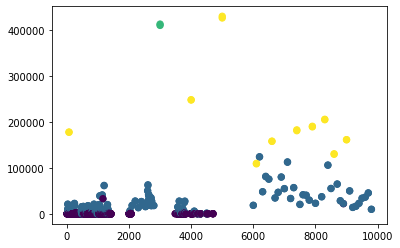

In [9]:
plt.scatter(data.values[:, 0], data.values[:, 1], c=labels, s=40, cmap='viridis');

In [10]:
probs = gmm.predict_proba(data)
print(probs[:5].round(3))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


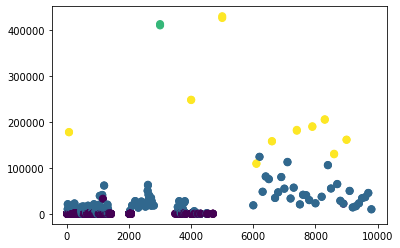

In [11]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(data.values[:, 0], data.values[:, 1], c=labels, cmap='viridis', s=size);

In [12]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width = height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    i= 0
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        if i ==0 :
            print(2 * np.sqrt(covar))
            i+=1
        draw_ellipse(pos, covar, ax = w * w_factor)

[[ 3052.12751601  4578.01132503  3698.01670474 ...  4663.29814117
   2192.16048081            nan]
 [ 4578.01132503 14468.64801599 11545.65374929 ... 14007.7300486
   8398.30425197            nan]
 [ 3698.01670474 11545.65374929  9341.86643712 ... 11585.53639096
   6118.86203138            nan]
 ...
 [ 4663.29814117 14007.7300486  11585.53639096 ... 15923.15723677
             nan            nan]
 [ 2192.16048081  8398.30425197  6118.86203138 ...            nan
  10529.28772247            nan]
 [           nan            nan            nan ...            nan
             nan   127.56729122]]


C:\Users\Amjad Nassar\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Amjad Nassar\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


AttributeError: 'numpy.float64' object has no attribute 'add_patch'

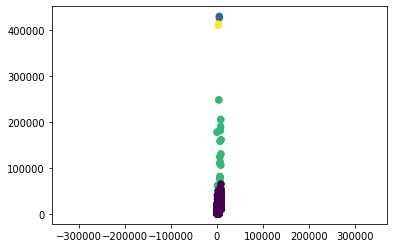

In [13]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, data.values)

### KMeans

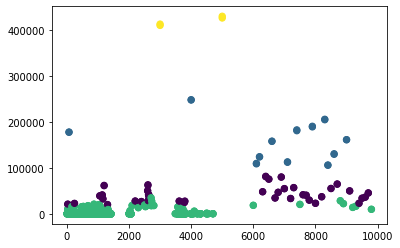

In [15]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(data).predict(data)
plt.scatter(data.values[:, 0], data.values[:, 1], c=labels, s=40, cmap='viridis');